# Regression Diagnostics with MTCARS

## Setup

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load Data

In [5]:
%%R -o mtcars

mtcars

                     mpg cyl  disp  hp

 drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3
Merc 450SL          17.3   8 275.8 180 3.07 3.730 17.60  0  0    3    3
Merc 450SLC         15.2   8 2

In [6]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


## Linear Model of Mtcars (`mpg ~ wt`)

### Run a linear model and show the plot

In [7]:
%%R 

model <- lm(mpg ~ wt, data=mtcars)
summary(model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10



`geom_smooth()` using formula = 'y ~ x'


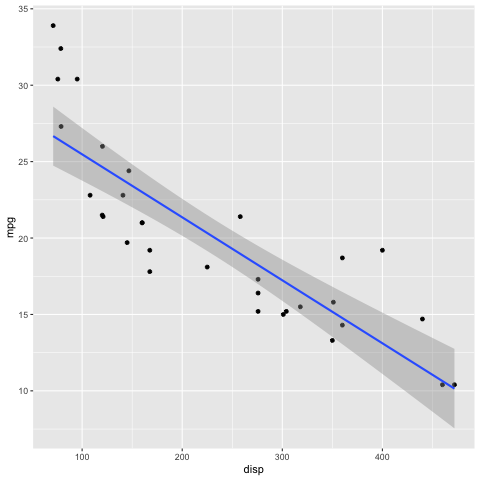

In [10]:
%%R  

# ggplot mpg vs wt

ggplot(mtcars, aes(x=disp, y=mpg)) + geom_point() + geom_smooth(method='lm')

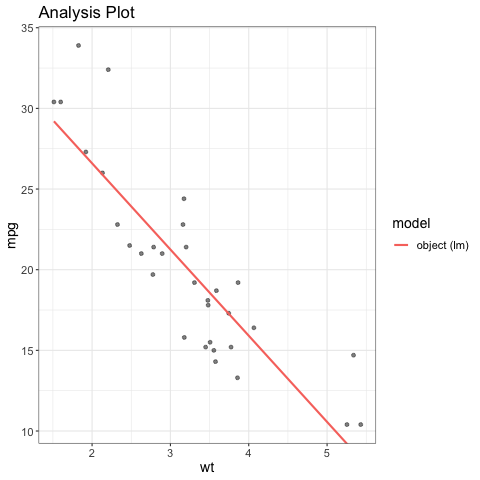

In [59]:
%%R 

library(flexplot)
# this is 
visualize(model, plot='model') 

## Look at the residuals and fitted values

In [60]:
%%R -o mtcars

mtcars <- mtcars %>%
    mutate(
        fitted = predict(model),
        residual = resid(model)
    ) 

In [61]:
mtcars.sort_values(by='residual', ascending=False)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fitted,residual
Fiat 128,32.4,4.0,78.7,66.0,4.08,2.200,19.47,1.0,1.0,4.0,1.0,25.527289,6.872711
Toyota Corolla,33.9,4.0,71.1,65.0,4.22,1.835,19.90,1.0,1.0,4.0,1.0,27.478021,6.421979
Chrysler Imperial,14.7,8.0,440.0,230.0,3.23,5.345,17.42,0.0,0.0,3.0,4.0,8.718926,5.981074
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0,20.236262,4.163738
Pontiac Firebird,19.2,8.0,400.0,175.0,3.08,3.845,17.05,0.0,0.0,3.0,2.0,16.735633,2.464367
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0,20.450041,2.349959
Lincoln Continental,10.4,8.0,460.0,215.0,3.00,5.424,17.82,0.0,0.0,3.0,4.0,8.296712,2.103288
Honda Civic,30.4,4.0,75.7,52.0,4.93,1.615,18.52,1.0,1.0,4.0,2.0,28.653805,1.746195
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0,20.102650,1.297350
Lotus Europa,30.4,4.0,95.1,113.0,3.77,1.513,16.90,1.0,1.0,5.0,2.0,29.198941,1.201059


## Diagnostic Plots of Residuals vs Fitted Values

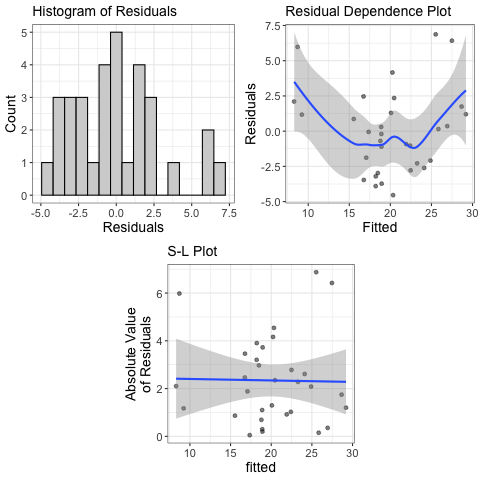

In [29]:
%%R 

library(flexplot)
visualize(model, plot='residuals')

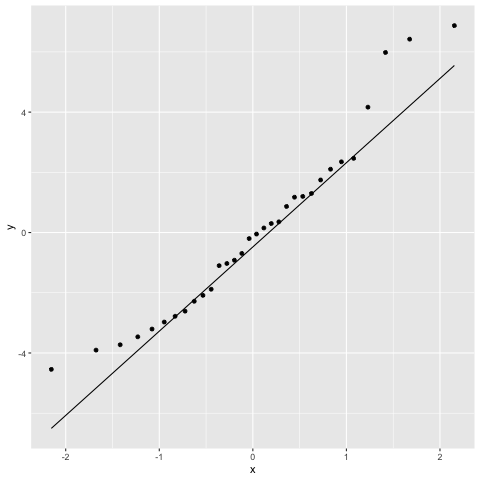

In [65]:
%%R

# make a q-q plot with ggplot
ggplot(mtcars) + 
    aes(sample=residual) + 
    geom_qq() + 
    geom_qq_line()